# Prodigy Infotech Task 4

# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# Data Manipulation and Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.head(30)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [5]:
df.tail(29)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18220,7,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS
18221,8,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,organic,2018,TotalUS
18222,9,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,organic,2018,TotalUS
18223,10,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS
18224,11,2018-01-07,1.51,1517332.70,129541.43,296490.29,1289.07,1089861.24,915452.78,174381.57,26.89,organic,2018,TotalUS
18225,0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18228,3,2018-03-04,1.46,347373.17,25990.60,71213.19,79.01,250090.37,85835.17,164087.33,167.87,organic,2018,West
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.shape

(18249, 14)

In [9]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
df = df[['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','type','region']]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,Albany
...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,WestTexNewMexico


In [12]:
df = df.drop('Date',axis=1)

In [13]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,Albany


In [14]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
type            0
region          0
dtype: int64

In [15]:
df.groupby('AveragePrice').mean()

,Total Volume,4046,4225,4770,Total Bags
AveragePrice,,,,,
0.44,64057.040,223.840,4748.880,0.000,59084.320
0.46,2200550.270,1200632.860,531226.650,18324.930,450365.830
0.48,50890.730,717.570,4138.840,0.000,46034.320
0.49,590865.730,369283.795,145665.525,5821.230,70095.180
0.51,868936.546,624146.334,144483.228,5683.116,94623.868
...,...,...,...,...,...
3.04,12656.320,419.060,4851.900,145.090,7240.270
3.05,2068.260,1043.830,77.360,0.000,947.070
3.12,19043.800,5898.490,10039.340,0.000,3105.970


In [16]:
df[['AveragePrice', 'Total Volume']]

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60
...,...,...
18244,1.63,17074.83
18245,1.71,13888.04
18246,1.87,13766.76
18247,1.93,16205.22


# Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>]], dtype=object)

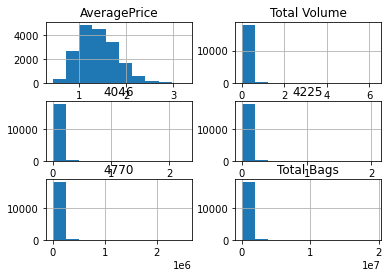

In [18]:
df.hist()

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

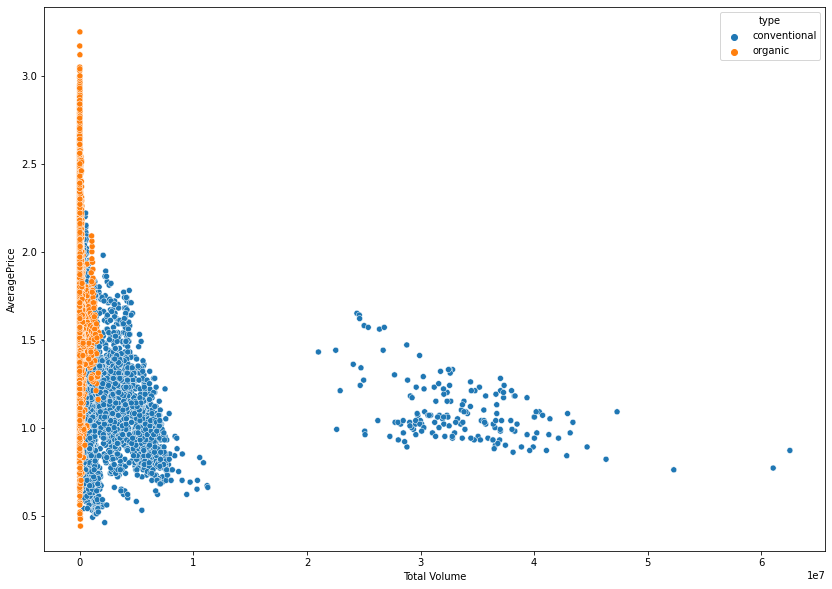

In [20]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=df)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution Average Price'}, xlabel='AveragePrice', ylabel='Density'>

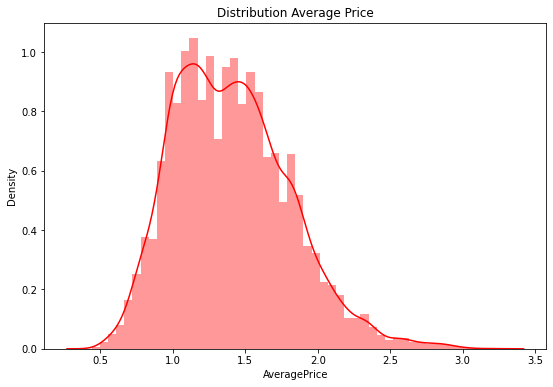

In [21]:
plt.figure(figsize=(9,6))
plt.title('Distribution Average Price')
sns.distplot(df['AveragePrice'],color='red')

<AxesSubplot:title={'center':'Price of avocado'}, xlabel='type', ylabel='AveragePrice'>

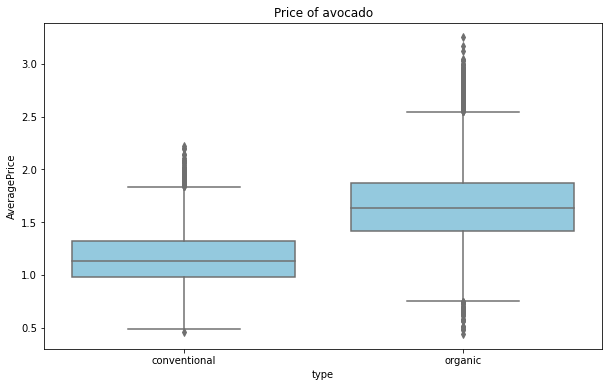

In [22]:
plt.figure(figsize=(10,6))
plt.title('Price of avocado')
sns.boxplot(x='type',y='AveragePrice',data=df,color='skyblue')

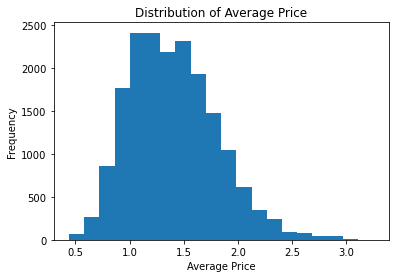

In [23]:
plt.hist(df['AveragePrice'],bins=20)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average Price')
plt.show()

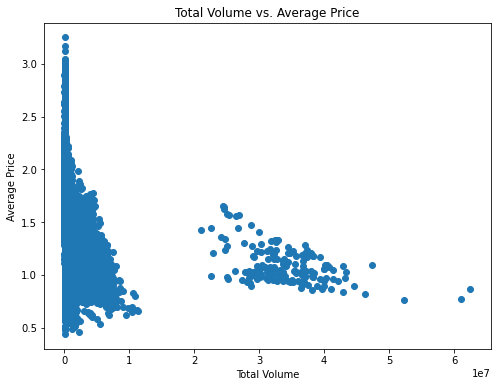

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df['Total Volume'],df['AveragePrice'])
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Total Volume vs. Average Price')
plt.show()

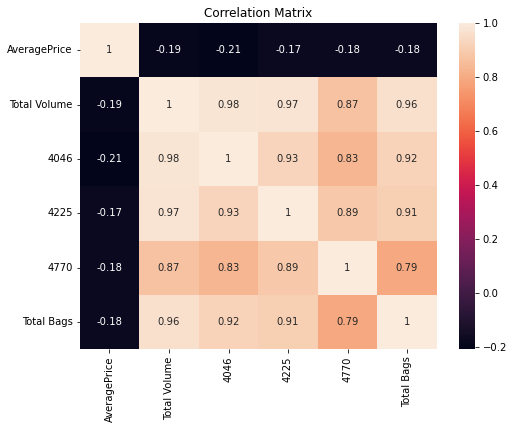

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

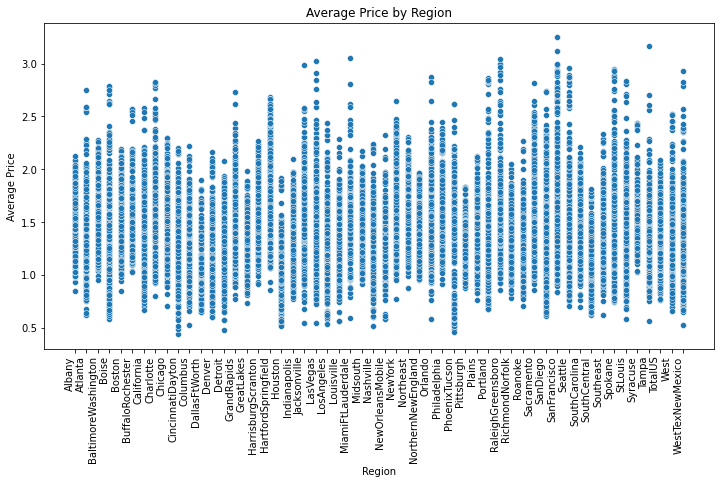

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='region',y='AveragePrice',data=df)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region')
plt.xticks(rotation=90, ha='right')
plt.show()

<AxesSubplot:title={'center':'Price of avocado in each country'}, xlabel='region', ylabel='AveragePrice'>

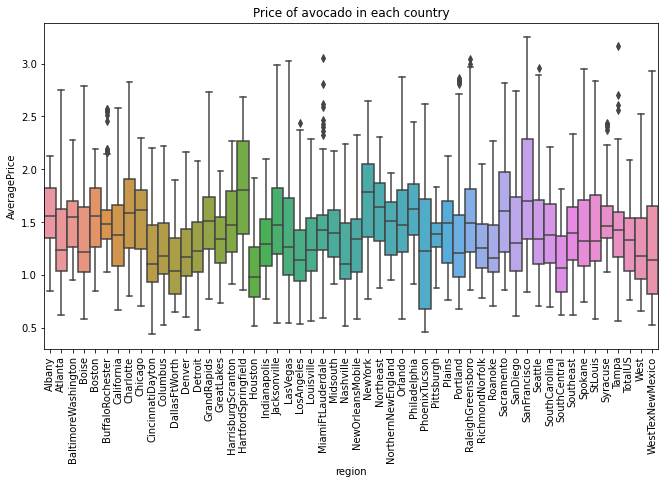

In [29]:
plt.figure(figsize=(11,6))
plt.title('Price of avocado in each country')
plt.xticks(rotation = 'vertical')
sns.boxplot(x='region',y='AveragePrice',data=df,width=1,whis=2)

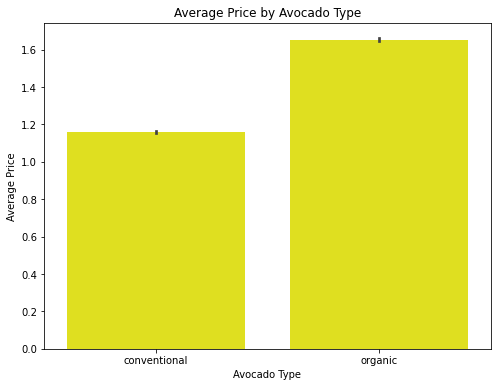

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x='type',y='AveragePrice',data=df,color='yellow')
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')
plt.title('Average Price by Avocado Type')
plt.show()

# Machine Learning

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [34]:
X = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']

In [35]:
label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.select_dtypes(include='object').columns:
    X_encoded[col] = label_encoder.fit_transform(X[col])

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
X_test[0:10]

,Total Volume,4046,4225,4770,Total Bags,type,region
8604,218329.70,79239.58,26356.05,2998.74,109735.33,0,10
2608,391514.43,228324.13,72749.38,100.62,90340.30,0,50
14581,3907.40,1147.09,39.51,0.00,2720.80,1,50
4254,267953.78,150786.30,27025.48,565.65,89576.35,0,27
16588,8805.28,828.39,3.24,0.00,7973.65,1,34
13954,5510.43,177.82,2574.21,212.43,2545.97,1,38
17460,1093955.66,114942.21,249231.14,940.89,728658.92,1,51
5504,32804733.22,10015825.13,12003751.56,1375260.47,9409896.06,0,51
17253,3628.33,272.73,1678.34,0.00,1677.26,1,47
7801,314828.77,114286.86,122377.33,21165.55,56999.03,0,41


In [40]:
y_test[0:10]

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
13954    1.29
17460    2.03
5504     0.94
17253    2.45
7801     1.83
Name: AveragePrice, dtype: float64

In [41]:
model.coef_

array([-2.19161897e-05,  2.18161739e-05,  2.20142320e-05,  2.15636731e-05,
        2.19367555e-05,  4.89749943e-01,  1.93440715e-05])

In [42]:
model.intercept_

1.1633545173308186

In [43]:
model.predict(X_test[0:10])

array([1.15940644, 1.15044066, 1.65401677, 1.15308824, 1.65384361,
       1.65405161, 1.67768417, 1.04819455, 1.6541854 , 1.1584263 ])